## SUV Price Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
df=pd.read_csv("suv_data.csv")

In [7]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [141]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

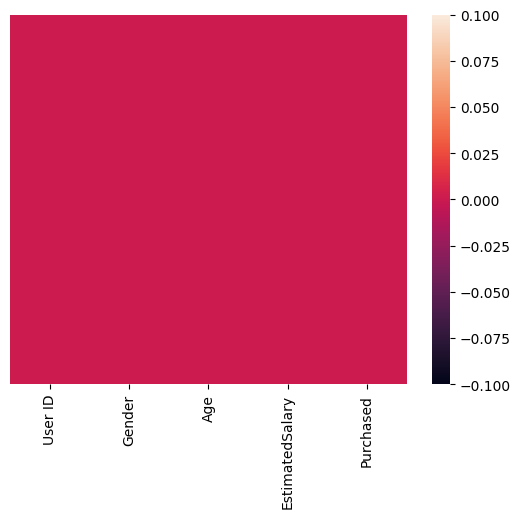

In [137]:
sns.heatmap(data=df.isnull(),yticklabels=False)

In [13]:
import seaborn as sns

<Axes: xlabel='Gender', ylabel='count'>

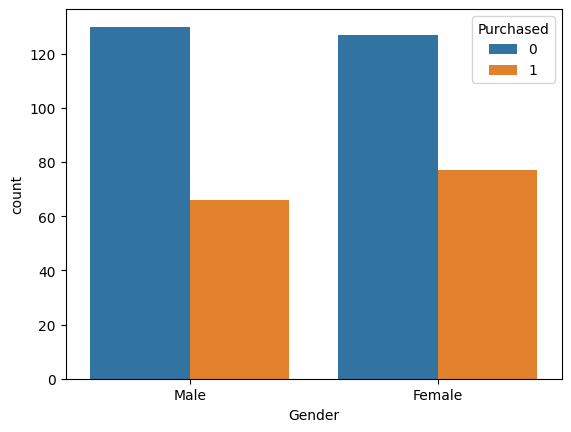

In [135]:
sns.countplot(data=df,x="Gender",hue="Purchased")
sns.countplot()

<Axes: xlabel='Gender', ylabel='Purchased'>

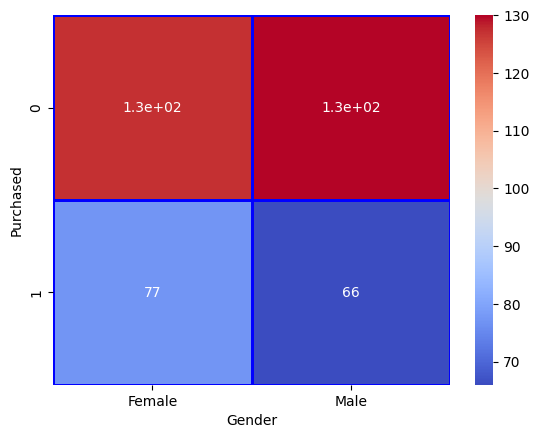

In [129]:
# Group the data by 'Purchased' and 'Gender'
df_grouped = df.groupby(['Purchased', 'Gender']).size().unstack()

# Create a heatmap
sns.heatmap(df_grouped, annot=True, cmap='coolwarm', linewidths=1, linecolor='blue')

<Axes: xlabel='Age', ylabel='Count'>

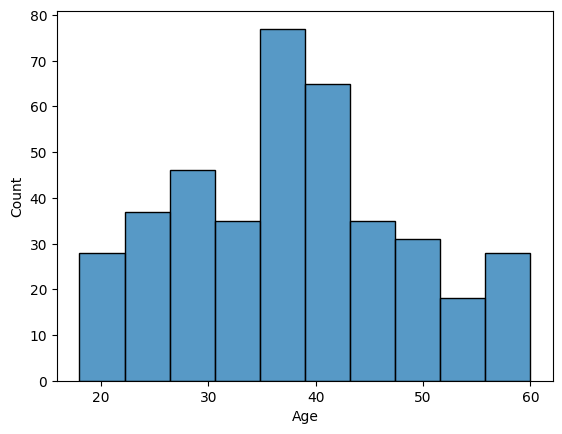

In [27]:
sns.histplot(data=df,x="Age")

## Logistic Regression

### Determining X and y variables

In [37]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [49]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Scale input values for better performance

In [67]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression

In [89]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [93]:
y_pred=classifier.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_test,y_pred)*100

89.0

## Linear regression

In [150]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [148]:
sex=pd.get_dummies(df["Gender"],drop_first=True)
sex.head()

,Male
0,True
1,True
2,False
3,False
4,True


In [156]:
df=pd.concat([df,sex],axis=1)
df=df.astype({col:int for col in df.select_dtypes('bool').columns})

In [158]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [168]:
##Dropped Gender using df.drop('Gender',axis=1,inplace=True)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [171]:
X=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [175]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [179]:
from sklearn.linear_model import LinearRegression

In [181]:
logmodel=LinearRegression()

In [185]:
X_train.columns=X_train.columns.astype(str)
X_test.columns=X_test.columns.astype(str)
logmodel.fit(X_train,y_train)

LinearRegression()

In [213]:
predictions=logmodel.predict(X_test)

In [219]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [221]:
confusion_matrix(y_test,predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [227]:
accuracy_score(y_test,predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets